# CS-E-106: Data Modeling
## Fall 2019: HW 07

### Important References and Links

*1. Link for model selection in R and Python:*

https://www.r-bloggers.com/practical-machine-learning-with-r-and-python-part-3/

*2. Exhaustive Feature Selector*

https://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

*3. Sequential Feature Selector:*

https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

*4. PRESS statistic:*

https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html

*5. Feature selection blog (own functions):

https://xavierbourretsicotte.github.io/subset_selection.html
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
https://github.com/JWarmenhoven/ISLR-python

In [7]:
# ! pip install mlxtend

In [89]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots
import pylab
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

**Question 1:** Refer to the CDI data set. A regression model relating serious crime rate (Y, total serious crimes divided by total population) to population density (X1, total population divided by land area) and unemployment rate (X3) is to be constructed. (15 pts)

**(a)** Fit second-order regression model (equation 8.8 on the book). Plot the residuals against the fitted values. How well does the second-order model appear to fit the data? What is R2? (5pts)

**Solution:**

In [9]:
cdi_data = pd.read_csv("data/CDI.csv")

df_1 = cdi_data

Y = df_1["Total serious crimes"]/df_1["Total population"]
X1 = df_1["Total population"]/df_1["Land area"]
X3 = df_1["Percent unemployment"]

df_1["x1"] = (X1-np.mean(X1))/np.std(X1)
df_1["x3"] = (X3-np.mean(X3))/np.std(X3)
df_1["x1sqr"] = df_1["x1"]**2
df_1["x3sqr"] = df_1["x3"]**2
df_1["x1x3"] = df_1["x1"]*df_1["x3"]

In [10]:
lm_cdi_1a = ols("Y~x1+x3+x1sqr+x3sqr+x1x3", data=df_1).fit()
lm_cdi_1a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.240     
Dependent Variable: Y                AIC:                -2033.8930
Date:               2019-11-19 21:44 BIC:                -2009.3723
No. Observations:   440              Log-Likelihood:     1022.9    
Df Model:           5                F-statistic:        28.70     
Df Residuals:       434              Prob (F-statistic): 3.69e-25  
R-squared:          0.248            Scale:              0.00056771
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept     0.0563     0.0013   44.6625   0.0000    0.0538   0.0588
x1            0.0101     0.0022    4.6589   0.0000    0.0058   0.0143
x3           -0.0002     0.0015   -0.1402   0.8886   -0.0031   0.0027
x1sqr         0.0000     0.0003    0.0455   0.9637   -0.0005   0.0006
x3sqr         0.0009     0.0005    1.7076   0.0884   -0.0001   0.0019
x1x3          0.0043     0.0021    2.0368   0.0423    0.0001   0.0084
-------------------------------------------------------------------
Omnibus:              22.989        Durbin-Watson:           1.787 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        25.127
Skew:                 0.571         Prob(JB):                0.000 
Kurtosis:             3.260         Condition No.:           21    
===================================================================

"""

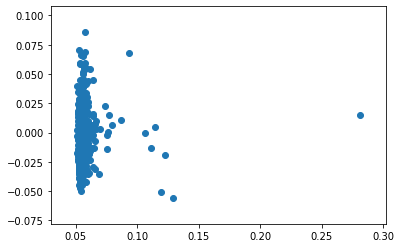

In [11]:
ei = lm_cdi_1a.resid
fitted_values = lm_cdi_1a.fittedvalues
plt.scatter(fitted_values,ei)

In [12]:
coeffs = lm_cdi_1a.params
coeffs

Intercept    0.056288
x1           0.010052
x3          -0.000205
x1sqr        0.000013
x3sqr        0.000889
x1x3         0.004266
dtype: float64

In [13]:
print("The regression model is Yhat = %s + %s*x1 + %s*x3 + %s*x1sqr + %s*x3sqr + %s*x1x3" %(coeffs["Intercept"], coeffs["x1"], coeffs["x3"], coeffs["x1sqr"], coeffs["x3sqr"], coeffs["x1x3"]))

The regression model is Yhat = 0.05628803374324597 + 0.01005156005150148*x1 + -0.0002054996301641967*x3 + 1.2966975612571088e-05*x1sqr + 0.0008885208310572405*x3sqr + 0.004266375165763692*x1x3


In [14]:
print("R-squared = %s"%lm_cdi_1a.rsquared)

R-squared = 0.24847487775386223


We can see that the regression model is not a very great fit based on the $R^2$ and the residual plot (we can see outliers and non-constant variance in the error terms).

**(b)** 

Test whether or not all quadratic and interaction terms can be dropped from the regression model; use α = .01. State the alternatives, decision rule, and conclusion. (5pts)

**Solution:**

In [15]:
lm_cdi_1b = ols("Y~x1+x3", data=df_1).fit()
lm_cdi_1b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.228     
Dependent Variable: Y                AIC:                -2030.2191
Date:               2019-11-19 21:44 BIC:                -2017.9588
No. Observations:   440              Log-Likelihood:     1018.1    
Df Model:           2                F-statistic:        65.92     
Df Residuals:       437              Prob (F-statistic): 9.55e-26  
R-squared:          0.232            Scale:              0.00057634
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept     0.0573     0.0011   50.0538   0.0000    0.0550   0.0595
x1            0.0131     0.0011   11.4387   0.0000    0.0108   0.0153
x3            0.0008     0.0011    0.7379   0.4609   -0.0014   0.0031
-------------------------------------------------------------------
Omnibus:              20.529        Durbin-Watson:           1.818 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        22.164
Skew:                 0.542         Prob(JB):                0.000 
Kurtosis:             3.188         Condition No.:           1     
===================================================================

"""

In [16]:
anova_lm(lm_cdi_1b, lm_cdi_1a)

/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,437.0,0.251862,0.0,NaN,NaN,NaN
1,434.0,0.246385,3.0,0.005477,3.215874,0.022775


In [17]:
FStar = 3.2159 # from the above anova 

df_diff = 3
df_E = lm_cdi_1b.df_resid
alpha = 0.01
FTest = stats.f.ppf(1-alpha, df_diff, df_E)
print(FTest)

3.826715087291002


*Hypotheses:*

$H_0: \beta_{11} = \beta_{33} = \beta_{13} = 0$ 

$H_a:$ Not all $\beta$'s are equal to zero


*Decision Rules:*

If $F^* \leq$ `r FTest`, conclude $H_0$

If $F^* >$ `r FTest`, conclude $H_a$

*Conclusion:*

Since our test statistic, $F^* =$ `r FStar`, and `r FStar` $\leq$ `r FTest`, we conclude $H_0$. Also, we can see that the p-value is 0.02278 (from ANOVA) which is greater that the given $\alpha=0.01$. Thus, we can remove all the quadratic and interaction terms.

**(c)** 

Instead of the predictor variable population density, total population (X1) and land area (X2) are to be employed as separate predictor variables, in addition to unemployment rate (X3). The regression model should contain linear and quadratic terms for total population, and linear terms only for land area and unemployment rate. (No interaction terms are to be included in this model.) Fit this regression model and obtain R2. Is this coefficient of multiple determination substantially different from the one for the regression model in part a? (5pts)

**Solution:**


In [18]:
df_1c = cdi_data
X1 = cdi_data["Total population"]
X2 = cdi_data["Land area"]
X3 = cdi_data["Percent unemployment"]

df_1c["x1"] = (X1-np.mean(X1))/np.std(X1)
df_1c["x2"] = (X2-np.mean(X2))/np.std(X2)
df_1c["x3"] = (X3-np.mean(X3))/np.std(X3)
df_1c["x1sqr"] = df_1c["x1"]**2


In [19]:
lm_cdi_1c = ols("Y~x1+x2+x3+x1sqr", data=df_1c).fit()
lm_cdi_1c.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.137     
Dependent Variable: Y                AIC:                -1978.8248
Date:               2019-11-19 21:44 BIC:                -1958.3909
No. Observations:   440              Log-Likelihood:     994.41    
Df Model:           4                F-statistic:        18.35     
Df Residuals:       435              Prob (F-statistic): 6.02e-14  
R-squared:          0.144            Scale:              0.00064484
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    0.0585     0.0012   47.5952   0.0000    0.0561    0.0609
x1           0.0177     0.0021    8.2762   0.0000    0.0135    0.0219
x2          -0.0009     0.0013   -0.6865   0.4927   -0.0033    0.0016
x3           0.0016     0.0012    1.2873   0.1987   -0.0008    0.0040
x1sqr       -0.0012     0.0002   -5.7095   0.0000   -0.0016   -0.0008
-------------------------------------------------------------------
Omnibus:             160.964       Durbin-Watson:          1.967   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1090.601
Skew:                1.404         Prob(JB):               0.000   
Kurtosis:            10.184        Condition No.:          18      
===================================================================

"""

In [20]:
anova_lm(lm_cdi_1c, lm_cdi_1a)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,435.0,0.280506,0.0,NaN,NaN,NaN
1,434.0,0.246385,1.0,0.034121,60.103526,6.460433e-14


In [21]:
print("R-squared = %s" %lm_cdi_1c.rsquared)

R-squared = 0.14439812795141238


*Interpretation:* 

We can see from the ANOVA that the model in Q1(c) is substantially different than the one in part (a), since the p-value is very low (<<0.001). Also, the $R^2$ is substantially different for the two models.


**Question 2** Refer to the CDI data set. The number of active physicians (Y) is to be regressed against total population (X1), total personal income (X2), and geographic region (X3, X4, X5). (15pts)

**(a)** Fit a first-order regression model. Let X3 =1 if NE and 0 otherwise, X4 = 1 if NC and 0 otherwise, and X5 = 1I if S and 0 otherwise. (5pts)


**Solution:**

In [22]:
df_2 = cdi_data

df_2["Y"] = df_2["Number of active physicians"]
df_2["X1"] = df_2["Total population"]
df_2["X2"] = df_2["Total personal income"]
df_2["X3"] = pd.get_dummies(df_2["Geographic region"])[1]
df_2["X4"] = pd.get_dummies(df_2["Geographic region"])[2]
df_2["X5"] = pd.get_dummies(df_2["Geographic region"])[3]

In [23]:
lm_cdi_2a = ols("Y~X1+X2+X3+X4+X5", data=df_2).fit()
lm_cdi_2a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.900     
Dependent Variable: Y                AIC:                6832.7739 
Date:               2019-11-19 21:44 BIC:                6857.2946 
No. Observations:   440              Log-Likelihood:     -3410.4   
Df Model:           5                F-statistic:        790.7     
Df Residuals:       434              Prob (F-statistic): 1.94e-215 
R-squared:          0.901            Scale:              3.2049e+05
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
Intercept  -207.4957   70.2816  -2.9523  0.0033  -345.6304  -69.3611
X1            0.0006    0.0003   1.9449  0.0524    -0.0000    0.0011
X2            0.1070    0.0133   8.0733  0.0000     0.0810    0.1331
X3          149.0196   86.8332   1.7162  0.0868   -21.6462  319.6854
X4          145.5264   85.1529   1.7090  0.0882   -21.8370  312.8898
X5          191.2163   80.0330   2.3892  0.0173    33.9158  348.5168
-------------------------------------------------------------------
Omnibus:             287.005       Durbin-Watson:          2.106   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3872.740
Skew:                2.603         Prob(JB):               0.000   
Kurtosis:            16.570        Condition No.:          3735632 
===================================================================
* The condition number is large (4e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

**(b)** 

Examine whether the effect for the northeastern region on number of active physicians differs from the effect for the north central region by constructing an appropriate 90 percent confidence interval. Interpret your interval estimate. (5pts)

In [24]:
alpha = 0.1
lm_cdi_2a.conf_int(alpha=alpha)

,0,1
Intercept,-323.345998,-91.645500
X1,0.000084,0.001019
X2,0.085162,0.128861
X3,5.886209,292.152935
X4,5.162733,285.890159
X5,59.292112,323.140497


*Interpretation:*

The confidence interval estimates for Northeastern region (X3) are not significantly different that those for Northcentral region (X4).

**(c)** 

Test whether any geographic effects are present; use α= .10. State the alternatives, decision rule, and conclusion. What is the P-value of the test? (5pts)

In [25]:
lm_cdi_2c = ols("Y~X1+X2", data=df_2).fit()
display(lm_cdi_2c.summary2())
anova_lm(lm_cdi_2c, lm_cdi_2a)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.899     
Dependent Variable: Y                AIC:                6832.6613 
Date:               2019-11-19 21:44 BIC:                6844.9216 
No. Observations:   440              Log-Likelihood:     -3413.3   
Df Model:           2                F-statistic:        1961.     
Df Residuals:       437              Prob (F-statistic): 5.41e-219 
R-squared:          0.900            Scale:              3.2258e+05
--------------------------------------------------------------------
               Coef.    Std.Err.     t     P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept     -64.4382   32.8258  -1.9630  0.0503  -128.9543  0.0779
X1              0.0005    0.0003   1.9135  0.0563    -0.0000  0.0011
X2              0.1072    0.0130   8.2692  0.0000     0.0817  0.1327
-------------------------------------------------------------------
Omnibus:             287.580       Durbin-Watson:          2.117   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3874.314
Skew:                2.611         Prob(JB):               0.000   
Kurtosis:            16.567        Condition No.:          871067  
===================================================================
* The condition number is large (9e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,437.0,1.409671e+08,0.0,NaN,NaN,NaN
1,434.0,1.390935e+08,3.0,1.873626e+06,1.948699,0.121032


In [26]:
FStar = 1.9487 # from the above anova 

df_diff = 3
df_E = lm_cdi_1b.df_resid
alpha = 0.1
FTest = stats.f.ppf(1-alpha, df_diff, df_E)
print(FTest)

2.0963615332508763


*Hypotheses:*

$H_0: \beta_{3} = \beta_{4} = \beta_{5} = 0$ 

$H_a:$ Not all $\beta$'s are equal to zero


*Decision Rules:*

If $F^* \leq$ `r FTest`, conclude $H_0$

If $F^* >$ `r FTest`, conclude $H_a$

*Conclusion:*

Since our test statistic, $F^* =$ `r FStar`, and `r FStar` $\leq$ `r FTest`, we conclude $H_0$. Thus, the geographic effects are not present.

**Quuestion 3** Refer to the Lung pressure Data. Increased arterial blood pressure in the lungs frequently leads to the development of heart failure in patients with chronic obstructive pulmonary disease (COPD). The standard method for determining arterial lung pressure is invasive, technically difficult, and involves some risk to the patient. Radionuclide imaging is a noninvasive, less risky method for estimating arterial pressure in the lungs. To investigate the predictive ability of this method, a cardiologist collected data on 19 mild-to-moderate COPD patients. The data includes the invasive measure of systolic pulmonary arterial pressure (Y) and three potential noninvasive predictor variables. Two were obtained by using radionuclide imaging emptying rate of blood into the pumping chamber or the heart (X1) and ejection rate of blood pumped out of the heart into the lungs (X2) and the third predictor variable measures blood gas (X3). (25pts)


**(a)** Fit the multiple regression function containing the three predictor variables us first-order terms. Does it appear that all predictor variables should be retained? (5pts)

**Solution:**

In [27]:
lung_data = pd.read_csv("data/Lung Pressure.csv")
lm_lung_3a = ols("Y~X1+X2+X3", data=lung_data).fit()
lm_lung_3a.summary2()

/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.537   
Dependent Variable: Y                AIC:                158.8476
Date:               2019-11-19 21:44 BIC:                162.6254
No. Observations:   19               Log-Likelihood:     -75.424 
Df Model:           3                F-statistic:        7.957   
Df Residuals:       15               Prob (F-statistic): 0.00208 
R-squared:          0.614            Scale:              208.07  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept    87.1875   21.5525   4.0454  0.0011  41.2495  133.1255
X1           -0.5645    0.4279  -1.3191  0.2069  -1.4766    0.3476
X2           -0.5132    0.2245  -2.2858  0.0372  -0.9916   -0.0347
X3           -0.0720    0.4546  -0.1583  0.8763  -1.0409    0.8969
-----------------------------------------------------------------
Omnibus:              2.637        Durbin-Watson:           1.171
Prob(Omnibus):        0.268        Jarque-Bera (JB):        1.623
Skew:                 0.716        Prob(JB):                0.444
Kurtosis:             2.979        Condition No.:           458  
=================================================================

"""

In [28]:
anova_lm(lm_lung_3a)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,3577.085399,3577.085399,17.191982,0.000862
X2,1.0,1384.378861,1384.378861,6.653522,0.020938
X3,1.0,5.213752,5.213752,0.025058,0.876334
Residual,15.0,3121.006199,208.067080,NaN,NaN


*Interpretation:* 

We see that the p-value for X2 and X3 show a good linear relation with Y, as they add a significant amount of SSR (based on ANOVA above and looking at the respective p-values). But X3 does not appear to add a significant value to the model when X1 and X2 are already present.

**(b)** Using first-order and second-order terms for each of the three predictor variables (centered around the mean) in the pool of potential X variables (including cross products of the first order terms), find the three best hierarchical subset regression models according to the R2a,p criterion. (5pts)

In [29]:
df_3 = lung_data

Y = df_3["Y"]
X1 = df_3["X1"]
X2 = df_3["X2"]
X3 = df_3["X3"]

df_3["x1"] = (X1-np.mean(X1))/np.std(X1)
df_3["x2"] = (X2-np.mean(X2))/np.std(X2)
df_3["x3"] = (X3-np.mean(X3))/np.std(X3)
df_3["x1sqr"] = df_3["x1"]**2
df_3["x2sqr"] = df_3["x2"]**2
df_3["x3sqr"] = df_3["x3"]**2
df_3["x1x2"] = df_3["x1"]*df_3["x2"]
df_3["x1x3"] = df_3["x1"]*df_3["x3"]
df_3["x2x3"] = df_3["x1"]*df_3["x3"]

In [30]:
lm_lung_3b1 = ols("Y~x1+x2+x3+x1sqr+x2sqr+x3sqr+x1x2+x1x3+x2x3", data=df_3).fit()
lm_lung_3b1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.662   
Dependent Variable: Y                AIC:                155.1594
Date:               2019-11-19 21:44 BIC:                163.6593
No. Observations:   19               Log-Likelihood:     -68.580 
Df Model:           8                F-statistic:        5.408   
Df Residuals:       10               Prob (F-statistic): 0.00787 
R-squared:          0.812            Scale:              151.85  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    36.9357    5.2016   7.1008  0.0000   25.3458  48.5257
x1           -6.3722    4.8391  -1.3168  0.2173  -17.1545   4.4100
x2          -16.5366    5.9653  -2.7722  0.0197  -29.8281  -3.2452
x3           -0.6799    3.3519  -0.2028  0.8433   -8.1485   6.7887
x1sqr         3.4094    6.5768   0.5184  0.6155  -11.2446  18.0634
x2sqr         4.0524    4.2310   0.9578  0.3607   -5.3747  13.4796
x3sqr        -1.5631    3.3670  -0.4643  0.6524   -9.0652   5.9389
x1x2          0.5822   11.2989   0.0515  0.9599  -24.5932  25.7577
x1x3         -0.5269    2.9443  -0.1790  0.8615   -7.0873   6.0335
x2x3         -0.5269    2.9443  -0.1790  0.8615   -7.0873   6.0335
-----------------------------------------------------------------
Omnibus:           4.589   Durbin-Watson:      1.799             
Prob(Omnibus):     0.101   Jarque-Bera (JB):   2.511             
Skew:              0.832   Prob(JB):           0.285             
Kurtosis:          3.637   Condition No.:      270862265005137696
=================================================================
* The condition number is large (3e+17). This might indicate
strong multicollinearity or other numerical problems.
"""

In [31]:
lm_lung_3b2 = ols("Y~x1+x2+x3+x2sqr+x3sqr+x1x2+x1x3+x2x3", data=df_3).fit()
lm_lung_3b2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.685   
Dependent Variable: Y                AIC:                153.6632
Date:               2019-11-19 21:44 BIC:                161.2187
No. Observations:   19               Log-Likelihood:     -68.832 
Df Model:           7                F-statistic:        6.579   
Df Residuals:       11               Prob (F-statistic): 0.00316 
R-squared:          0.807            Scale:              141.75  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    38.0738    4.5562   8.3565  0.0000   28.0457  48.1019
x1           -5.5007    4.3843  -1.2546  0.2356  -15.1504   4.1490
x2          -16.9621    5.7088  -2.9713  0.0127  -29.5270  -4.3973
x3           -0.4268    3.2041  -0.1332  0.8964   -7.4789   6.6253
x2sqr         3.2754    3.8228   0.8568  0.4098   -5.1385  11.6892
x3sqr        -2.0818    3.1062  -0.6702  0.5165   -8.9184   4.7548
x1x2          6.1381    3.4569   1.7756  0.1034   -1.4704  13.7466
x1x3          0.1247    2.5725   0.0485  0.9622   -5.5373   5.7868
x2x3          0.1247    2.5725   0.0485  0.9622   -5.5373   5.7868
-----------------------------------------------------------------
Omnibus:          4.723    Durbin-Watson:       1.775            
Prob(Omnibus):    0.094    Jarque-Bera (JB):    2.566            
Skew:             0.827    Prob(JB):            0.277            
Kurtosis:         3.712    Condition No.:       64576486039554384
=================================================================
* The condition number is large (6e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

In [32]:
lm_lung_3b3 = ols("Y~x1+x2+x3+x3sqr+x1x2+x1x3+x2x3", data=df_3).fit()
lm_lung_3b3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.691   
Dependent Variable: Y                AIC:                152.8907
Date:               2019-11-19 21:44 BIC:                159.5018
No. Observations:   19               Log-Likelihood:     -69.445 
Df Model:           6                F-statistic:        7.724   
Df Residuals:       12               Prob (F-statistic): 0.00144 
R-squared:          0.794            Scale:              138.61  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    38.7931    4.4283   8.7602  0.0000   29.1446  48.4415
x1           -6.8889    4.0285  -1.7100  0.1130  -15.6663   1.8885
x2          -14.0415    4.5283  -3.1008  0.0092  -23.9078  -4.1752
x3           -0.4068    3.1683  -0.1284  0.9000   -7.3099   6.4963
x3sqr        -0.8115    2.6991  -0.3007  0.7688   -6.6924   5.0693
x1x2          8.0316    2.6286   3.0555  0.0100    2.3044  13.7589
x1x3         -0.4137    2.4668  -0.1677  0.8696   -5.7883   4.9609
x2x3         -0.4137    2.4668  -0.1677  0.8696   -5.7883   4.9609
-----------------------------------------------------------------
Omnibus:          4.683    Durbin-Watson:       1.804            
Prob(Omnibus):    0.096    Jarque-Bera (JB):    2.655            
Skew:             0.872    Prob(JB):            0.265            
Kurtosis:         3.557    Condition No.:       53660872398252640
=================================================================
* The condition number is large (5e+16). This might indicate
strong multicollinearity or other numerical problems.
"""

In [33]:
lm_lung_3b4 = ols("Y~x1+x2+x3+x3sqr+x1x2+x2x3", data=df_3).fit()
lm_lung_3b4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.691   
Dependent Variable: Y                AIC:                152.8907
Date:               2019-11-19 21:44 BIC:                159.5018
No. Observations:   19               Log-Likelihood:     -69.445 
Df Model:           6                F-statistic:        7.724   
Df Residuals:       12               Prob (F-statistic): 0.00144 
R-squared:          0.794            Scale:              138.61  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    38.7931    4.4283   8.7602  0.0000   29.1446  48.4415
x1           -6.8889    4.0285  -1.7100  0.1130  -15.6663   1.8885
x2          -14.0415    4.5283  -3.1008  0.0092  -23.9078  -4.1752
x3           -0.4068    3.1683  -0.1284  0.9000   -7.3099   6.4963
x3sqr        -0.8115    2.6991  -0.3007  0.7688   -6.6924   5.0693
x1x2          8.0316    2.6286   3.0555  0.0100    2.3044  13.7589
x2x3         -0.8274    4.9335  -0.1677  0.8696  -11.5766   9.9219
-----------------------------------------------------------------
Omnibus:              4.683        Durbin-Watson:           1.804
Prob(Omnibus):        0.096        Jarque-Bera (JB):        2.655
Skew:                 0.872        Prob(JB):                0.265
Kurtosis:             3.557        Condition No.:           4    
=================================================================

"""

In [34]:
lm_lung_3b5 = ols("Y~x1+x2+x3+x1x2+x2x3", data=df_3).fit()
lm_lung_3b5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.713   
Dependent Variable: Y                AIC:                151.0333
Date:               2019-11-19 21:44 BIC:                156.7000
No. Observations:   19               Log-Likelihood:     -69.517 
Df Model:           5                F-statistic:        9.947   
Df Residuals:       13               Prob (F-statistic): 0.000434
R-squared:          0.793            Scale:              128.92  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    37.8664    3.0664  12.3488  0.0000   31.2418  44.4909
x1           -6.9793    3.8742  -1.8015  0.0949  -15.3490   1.3904
x2          -14.1959    4.3388  -3.2718  0.0061  -23.5693  -4.8225
x3           -0.4026    3.0554  -0.1318  0.8972   -7.0034   6.1982
x1x2          8.2236    2.4590   3.3442  0.0053    2.9112  13.5361
x2x3         -0.6068    4.7049  -0.1290  0.8993  -10.7712   9.5576
-----------------------------------------------------------------
Omnibus:              5.041        Durbin-Watson:           1.759
Prob(Omnibus):        0.080        Jarque-Bera (JB):        2.879
Skew:                 0.897        Prob(JB):                0.237
Kurtosis:             3.645        Condition No.:           4    
=================================================================

"""

In [35]:
lm_lung_3b6 = ols("Y~x1+x2+x1x2+x2x3", data=df_3).fit()
lm_lung_3b6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.733   
Dependent Variable: Y                AIC:                149.0587
Date:               2019-11-19 21:44 BIC:                153.7809
No. Observations:   19               Log-Likelihood:     -69.529 
Df Model:           4                F-statistic:        13.37   
Df Residuals:       14               Prob (F-statistic): 0.000108
R-squared:          0.793            Scale:              119.87  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    37.8613    2.9566  12.8057  0.0000   31.5200  44.2025
x1           -7.1348    3.5582  -2.0052  0.0647  -14.7665   0.4968
x2          -13.9298    3.7030  -3.7618  0.0021  -21.8720  -5.9877
x1x2          8.2297    2.3708   3.4713  0.0037    3.1449  13.3145
x2x3         -0.6314    4.5333  -0.1393  0.8912  -10.3543   9.0915
-----------------------------------------------------------------
Omnibus:              5.546        Durbin-Watson:           1.720
Prob(Omnibus):        0.062        Jarque-Bera (JB):        3.287
Skew:                 0.961        Prob(JB):                0.193
Kurtosis:             3.675        Condition No.:           3    
=================================================================

"""

In [36]:
lm_lung_3b7 = ols("Y~x1+x2+x1x2", data=df_3).fit()
lm_lung_3b7.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.751   
Dependent Variable: Y                AIC:                147.0850
Date:               2019-11-19 21:44 BIC:                150.8628
No. Observations:   19               Log-Likelihood:     -69.543 
Df Model:           3                F-statistic:        19.06   
Df Residuals:       15               Prob (F-statistic): 2.23e-05
R-squared:          0.792            Scale:              112.03  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    37.8882    2.8522  13.2838  0.0000   31.8089  43.9675
x1           -7.3105    3.2165  -2.2728  0.0382  -14.1663  -0.4548
x2          -13.7224    3.2776  -4.1867  0.0008  -20.7085  -6.7363
x1x2          8.2331    2.2918   3.5923  0.0027    3.3481  13.1180
-----------------------------------------------------------------
Omnibus:              4.466        Durbin-Watson:           1.734
Prob(Omnibus):        0.107        Jarque-Bera (JB):        2.559
Skew:                 0.868        Prob(JB):                0.278
Kurtosis:             3.466        Condition No.:           3    
=================================================================

"""

We can see that `lm_lung_3b5`, `lm_lung_3b6` and `lm_lung_3b7` are the three best hierarchical subset regression models based on Adjusted R-squared.

In [37]:
X = df_3[["x1","x2","x3","x1sqr","x2sqr","x3sqr","x1x2","x1x3","x2x3"]]
Y = df_3["Y"]

In [38]:
lr = LinearRegression()
efs1 = EFS(lr, 
           min_features=1,
           max_features=len(X.columns),
           scoring='r2',
           print_progress=True,
           cv=5)


# Create a efs fit
efs1 = efs1.fit(X.as_matrix(), Y.as_matrix())

/home/srk-apts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
Features: 511/511

In [39]:
print('Best R2: %.2f' % efs1.best_score_)
## Print the IDX of the best features 
print('Best subset:', efs1.best_idx_)

Best R2: 0.20
Best subset: (1, 4, 5, 6)


**(c)** Is there much difference in R2a,p for the three best subset models? (5pts)

**Solution:**

`lm_lung_3b5`, `lm_lung_3b6` and `lm_lung_3b7` have an adjusted $R^2$ of 0.7228, 0.7418, 0.7507 respectively. Thus, they have more or less the same adjusted $R^2$.

**(d)** Calculate the PRESS statistic and compare it to SSE. What does this comparison suggest about the validity of MSE as an indicator of the predictive ability of the fitted model? (5pts)

**Solution:**

See links above

In [40]:
display(OLSInfluence(lm_lung_3b7).ess_press)

residuals_press_squared = OLSInfluence(lm_lung_3b7).resid_press**2
display(residuals_press_squared)

5102.494352597143

0      599.857733
1       20.601552
2      100.221227
3       46.774087
4       38.220776
5       61.692510
6      944.435484
7     2546.462424
8       16.840056
9      180.637066
10      66.682554
11       2.112831
12     239.401767
13      61.292429
14       7.630673
15      21.079224
16      68.120022
17       0.457655
18      79.974284
dtype: float64

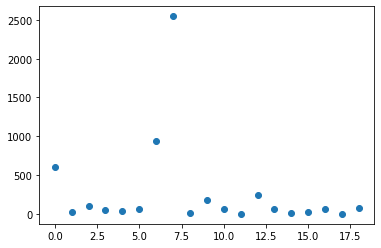

In [41]:
plt.scatter(range(len(residuals_press_squared)),residuals_press_squared)

In [42]:
anova_lm(lm_lung_3b7)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,3577.085399,3577.085399,31.929429,0.000046
x2,1.0,1384.378861,1384.378861,12.357107,0.003124
x1x2,1.0,1445.755148,1445.755148,12.904958,0.002667
Residual,15.0,1680.464802,112.030987,NaN,NaN


SSE is 1680.5 for the best model chosen above and the PRESS stat is 5102.5. This means that there are a few observations in the data set are significantly driving the model's coefficients.

**(e)** Case 8 alone accounts for approximately one-half of the entire PRESS statistic. Would you recommend modification of the model because of the strong impact of this case? What are some corrective action options that would lessen the effect of case 8? (5pts)

**Solution:**

- PRESS statistic for case 8 is $\approx$ 2500. This clearly indicates that case 8 is an outlier. 
- Thus, case 8 should be taken out from the model building data set and the same model can be refitted.


In [43]:
exc_ind = df_3.index.isin([7])
exc_ind

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [44]:
ols("Y ~ x1 + x2 + x1x2", data=df_3[~exc_ind]).fit().summary2()

/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.786   
Dependent Variable: Y                AIC:                137.0679
Date:               2019-11-19 21:45 BIC:                140.6294
No. Observations:   18               Log-Likelihood:     -64.534 
Df Model:           3                F-statistic:        21.80   
Df Residuals:       14               Prob (F-statistic): 1.53e-05
R-squared:          0.824            Scale:              97.893  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    35.9485    2.8804  12.4803  0.0000   29.7706  42.1263
x1           -0.0726    5.0582  -0.0143  0.9888  -10.9214  10.7763
x2          -16.8459    3.5311  -4.7708  0.0003  -24.4192  -9.2725
x1x2         15.2724    4.4988   3.3947  0.0044    5.6234  24.9215
-----------------------------------------------------------------
Omnibus:              8.305        Durbin-Watson:           1.913
Prob(Omnibus):        0.016        Jarque-Bera (JB):        5.328
Skew:                 1.083        Prob(JB):                0.070
Kurtosis:             4.552        Condition No.:           4    
=================================================================

"""

We can see a significant improvement in Adjusted $R^2$.

**Question 4** Refer to the Website developer data set. Management is interested in determining what variables have the greatest impact on production output in the release of new customer websites. Data on 13 three-person website developed teams consisting of a project manager, a designer. and a developer are provided in the data set. Production data from January 2001 through August 2002 include four potential predictors; (1) the change in the website development process. (2) the size of the backlog of orders, (3) the team effect, and (4) the number of months experience of each team. (10 pts)

**(a)** Develop a best subset model for predicting production output. Justify your choice of model. Assess your model's ability to predict and discuss its use as a tool for management decisions. (10 pts)

**Solution:**

In [59]:
website_data = pd.read_csv("data/Website Developer.csv")
mapper = {"Process change": "process_change",
          "Team number": "team_number",
          "Websites delivered": "websites_delivered",
          "Backlog of orders": "backlog",
          "Team experience": "team_experience",
          "Year": "year"         
         }

website_data = website_data.rename(columns=mapper)

In [60]:
website_data["process_change"] = website_data["process_change"].astype("category")
website_data["team_number"] = website_data["team_number"].astype("category")
website_data.describe()

,websites_delivered,backlog,team_experience,year,Quarter
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,9.041096,27.821918,10.849315,2001.520548,2.342466
std,7.083703,7.976254,5.663409,0.503035,1.030361
min,0.000000,3.000000,2.000000,2001.000000,1.000000
25%,3.000000,23.000000,6.000000,2001.000000,1.000000
50%,7.000000,28.000000,11.000000,2002.000000,2.000000
75%,13.000000,34.000000,15.000000,2002.000000,3.000000
max,30.000000,45.000000,21.000000,2002.000000,4.000000


In [62]:
model = ols("websites_delivered~process_change+backlog+team_number+team_experience", data=website_data).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS                Adj. R-squared:     0.516   
Dependent Variable: websites_delivered AIC:                453.9118
Date:               2019-11-19 21:57   BIC:                490.5591
No. Observations:   73                 Log-Likelihood:     -210.96 
Df Model:           15                 F-statistic:        6.125   
Df Residuals:       57                 Prob (F-statistic): 2.21e-07
R-squared:          0.617              Scale:              24.268  
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           -1.5567   3.0831 -0.5049 0.6156 -7.7306  4.6171
process_change[T.1]  7.6201   2.0530  3.7118 0.0005  3.5091 11.7311
team_number[T.2]     2.6133   2.6369  0.9911 0.3258 -2.6669  7.8936
team_number[T.3]     1.1555   2.6332  0.4388 0.6625 -4.1175  6.4284
team_number[T.4]     3.3907   2.6337  1.2874 0.2031 -1.8832  8.6646
team_number[T.5]     5.8531   2.6402  2.2169 0.0306  0.5662 11.1400
team_number[T.6]     3.5332   2.6451  1.3357 0.1869 -1.7636  8.8299
team_number[T.7]     9.5307   3.2572  2.9260 0.0049  3.0082 16.0532
team_number[T.8]     9.6138   3.2465  2.9613 0.0045  3.1128 16.1148
team_number[T.9]     7.2348   2.7664  2.6152 0.0114  1.6951 12.7745
team_number[T.10]    2.1906   2.9404  0.7450 0.4593 -3.6974  8.0785
team_number[T.11]    5.2396   3.7326  1.4037 0.1658 -2.2348 12.7140
team_number[T.12]    6.6160   4.7565  1.3910 0.1696 -2.9086 16.1406
team_number[T.13]    2.5165   2.6388  0.9536 0.3443 -2.7677  7.8006
backlog              0.0883   0.1225  0.7212 0.4738 -0.1569  0.3336
team_experience      0.1298   0.2268  0.5725 0.5693 -0.3243  0.5839
-------------------------------------------------------------------
Omnibus:                1.597        Durbin-Watson:           1.970
Prob(Omnibus):          0.450        Jarque-Bera (JB):        1.583
Skew:                   0.279        Prob(JB):                0.453
Kurtosis:               2.543        Condition No.:           411  
===================================================================

"""

In [140]:
X1 = pd.get_dummies(website_data[["team_number"]]).iloc[:,1:]
X2 = website_data[["process_change","backlog","team_experience"]]
X = pd.concat((X1,X2), axis=1)
X.columns

Index(['team_number_2', 'team_number_3', 'team_number_4', 'team_number_5',
       'team_number_6', 'team_number_7', 'team_number_8', 'team_number_9',
       'team_number_10', 'team_number_11', 'team_number_12', 'team_number_13',
       'process_change', 'backlog', 'team_experience'],
      dtype='object')

In [141]:
Y = website_data["websites_delivered"].astype("float64")

In [142]:
lr = LinearRegression()
efs1 = EFS(lr, 
           min_features=1,
           max_features=len(X.columns),
           scoring='r2',
           print_progress=True,
           cv=2)


# Create a efs fit
efs1 = efs1.fit(X.as_matrix(), Y.as_matrix())

/home/srk-apts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
Features: 3000/32767IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 9197/32767IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 15649/32767IOPub message rate exceeded.
The notebook server will tempora

In [143]:
print('Best R2: %.2f' % efs1.best_score_)
## Print the IDX of the best features 
print('Best subset:', efs1.best_idx_)

Best R2: 0.19
Best subset: (0, 1, 5, 6, 7, 9, 11, 12)


In [155]:
sfs1 = SFS(lr,
           k_features="parsimonious", #the best smallest feature subset
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=0)

sfs1 = sfs1.fit(X.as_matrix(), Y.as_matrix())

/home/srk-apts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2019-11-20 00:03:59] Features: 1/15 -- score: 0.4718672371999554[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2019-11-20 00:03:59] Features: 2/15 -- score: 0.5044129870366437[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | ela

In [158]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

/home/srk-apts/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/srk-apts/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)",[0.4718672371999554],0.471867,"(12,)",NaN,0,NaN
2,"(6, 12)",[0.5044129870366437],0.504413,"(6, 12)",NaN,0,NaN
3,"(5, 6, 12)",[0.5350598680180407],0.53506,"(5, 6, 12)",NaN,0,NaN
4,"(5, 6, 7, 12)",[0.5592608593477235],0.559261,"(5, 6, 7, 12)",NaN,0,NaN
5,"(3, 5, 6, 7, 12)",[0.5799320016686794],0.579932,"(3, 5, 6, 7, 12)",NaN,0,NaN
6,"(3, 5, 6, 7, 12, 13)",[0.5892797358650618],0.58928,"(3, 5, 6, 7, 12, 13)",NaN,0,NaN
7,"(3, 5, 6, 7, 10, 12, 13)",[0.5936306986428936],0.593631,"(3, 5, 6, 7, 10, 12, 13)",NaN,0,NaN
8,"(3, 5, 6, 7, 9, 10, 12, 13)",[0.597656117981118],0.597656,"(3, 5, 6, 7, 9, 10, 12, 13)",NaN,0,NaN
9,"(3, 4, 5, 6, 7, 9, 10, 12, 13)",[0.6012814856303262],0.601281,"(3, 4, 5, 6, 7, 9, 10, 12, 13)",NaN,0,NaN
10,"(2, 3, 4, 5, 6, 7, 9, 10, 12, 13)",[0.6063212237921654],0.606321,"(2, 3, 4, 5, 6, 7, 9, 10, 12, 13)",NaN,0,NaN
